# Statystyczna Analiza Danych

## Autorzy: Grzegorz Mazur, Marcin Ryt, Kamil Żebrok

Analizę przeprowadziliśmy na zbiorze danych z informacjami na temat jabłek zebranych przez pewną amerykańską firmę rolniczą. Bazowaliśmy na poniższych kolumnach:
- ID jabłka
- Rozmiar jabłka
- Waga jabłka
- Słodkość jabłka
- Chrupkość jabłka
- Soczystość jabłka
- Dojrzałość jabłka
- Kwasowość jabłka
- Ogólna jakość jabłka (dobra/zła)

Dane pochodzą ze strony: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

Zbiór danych został ustandaryzowany metodą z-score.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from scipy.stats import skew, kurtosis, pearsonr, spearmanr, kendalltau, ttest_rel, norm, ttest_ind, ttest_1samp, f, t, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("sample_data/apple_quality.csv")
print(df.head(10))
print(df.info())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
5   5.0 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
6   6.0  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417   
7   7.0 -1.995462 -0.428958   1.530644    -0.742972   0.158834  0.974438   
8   8.0 -3.867632 -3.734514   0.986429    -1.207655   2.292873  4.080921   
9   9.0 -0.727983 -0.442820  -4.092223     0.597513   0.393714  1.620857   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  
5  -2.9

# Czyszczenie danych i preprocessing

In [ ]:
df=df.dropna(axis=0)
df["Acidity"]=df["Acidity"].astype(np.float64)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB
None
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413

# Podstawowe statystyczne parametry i wykresy

- podstawowe parametry statystyczne -> `df.describe()`
- displot lub kdeplot,współczynnik asymetrii i skośność dla kolumn liczbowych
- histogramy dla kolumn kategorycznych
- wykresy ramka-wąsy
- histogramy po grupach

In [ ]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75% 

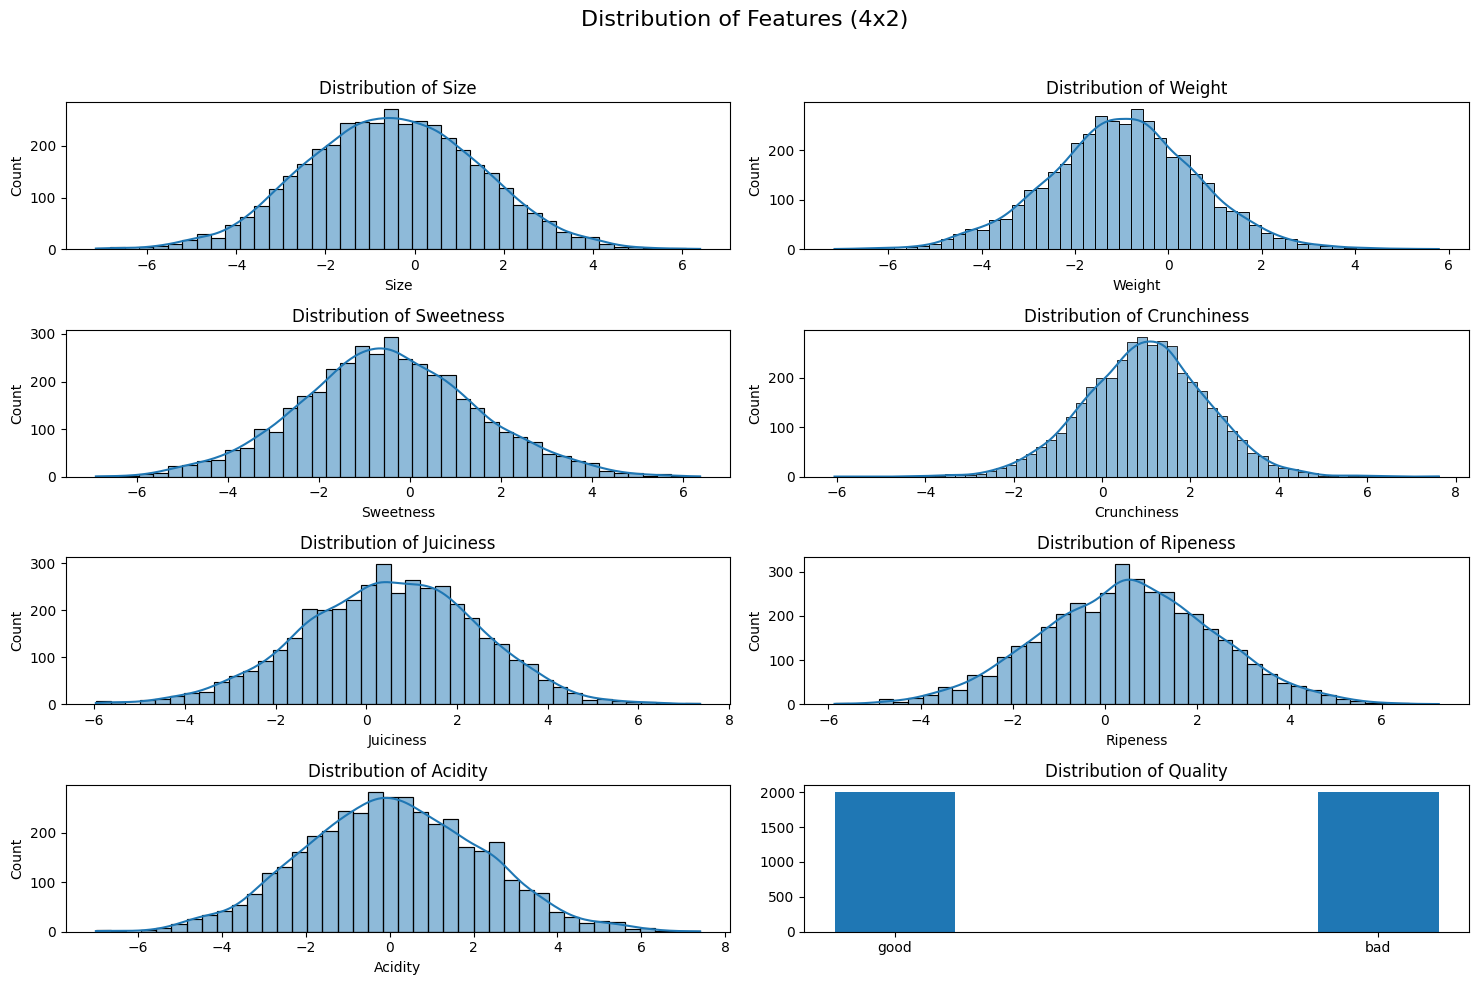


Skewness: 0.055762532378246056, Kurtosis: -0.09483426783221782



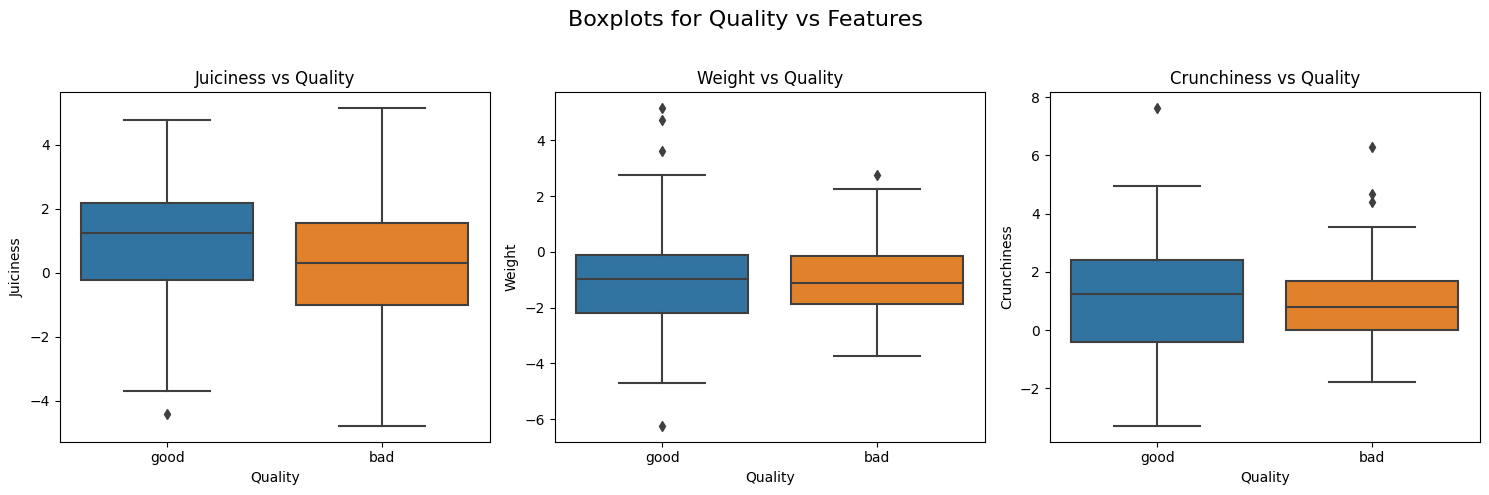

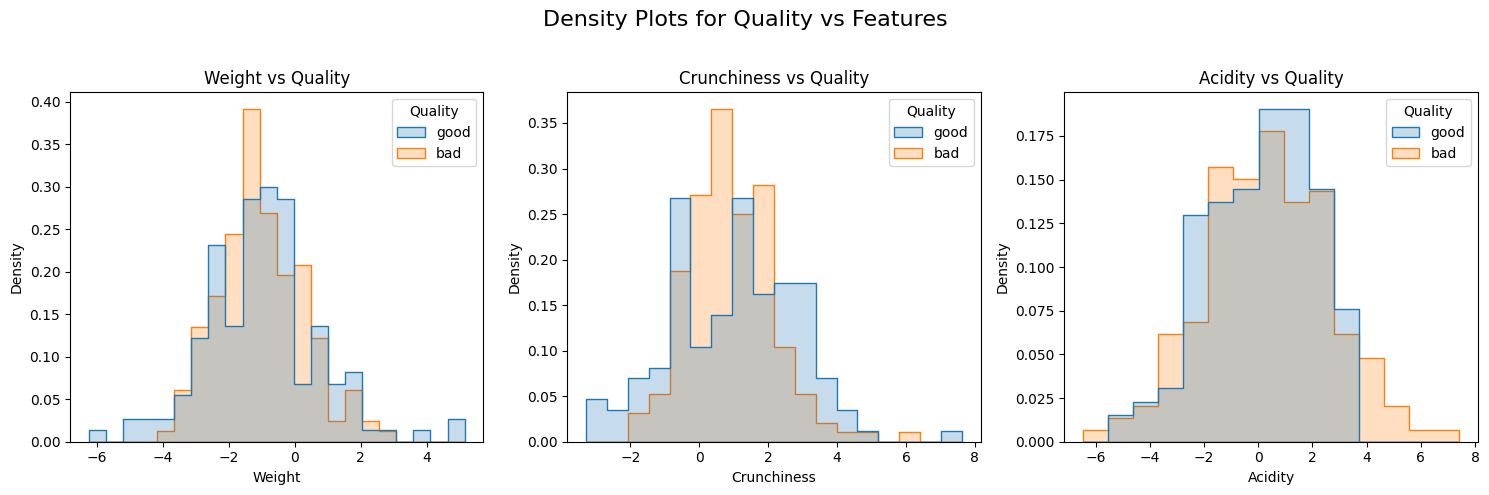

In [ ]:
print(df.describe())

fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.suptitle('Distribution of Features (4x2)', fontsize=16)

for i, column in enumerate(df.columns[1:-1]):
    sns.histplot(df[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {column}')

plt.tight_layout(rect=[0, 0, 1, 0.96])

axes[3,1].bar(df["Quality"].value_counts().index,df["Quality"].value_counts().values,width=0.25)
axes[3,1].set_title("Distribution of Quality")
plt.show()

acidity_skewness = skew(df['Acidity'])
acidity_kurtosis = kurtosis(df['Acidity'])
print(f"\nSkewness: {acidity_skewness}, Kurtosis: {acidity_kurtosis}\n")

indexes_by_value = df.groupby('Quality').apply(lambda x: x.index.tolist())






fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Boxplots for Quality vs Features', fontsize=16)

sns.boxplot(x='Quality', y='Juiciness', data=df[:300], ax=axes[0])
axes[0].set_title('Juiciness vs Quality')

sns.boxplot(x='Quality', y='Weight', data=df[:300], ax=axes[1])
axes[1].set_title('Weight vs Quality')

sns.boxplot(x='Quality', y='Crunchiness', data=df[:300], ax=axes[2])
axes[2].set_title('Crunchiness vs Quality')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Density Plots for Quality vs Features', fontsize=16)

sns.histplot(data=df[:300], x='Weight', hue='Quality', element='step', stat='density', common_norm=False, ax=axes[0])
axes[0].set_title('Weight vs Quality')

sns.histplot(data=df[:300], x='Crunchiness', hue='Quality', element='step', stat='density', common_norm=False, ax=axes[1])
axes[1].set_title('Crunchiness vs Quality')

sns.histplot(data=df[:300], x='Acidity', hue='Quality', element='step', stat='density', common_norm=False, ax=axes[2])
axes[2].set_title('Acidity vs Quality')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Korelacja

## Korelacja Pearsona

<Axes: >

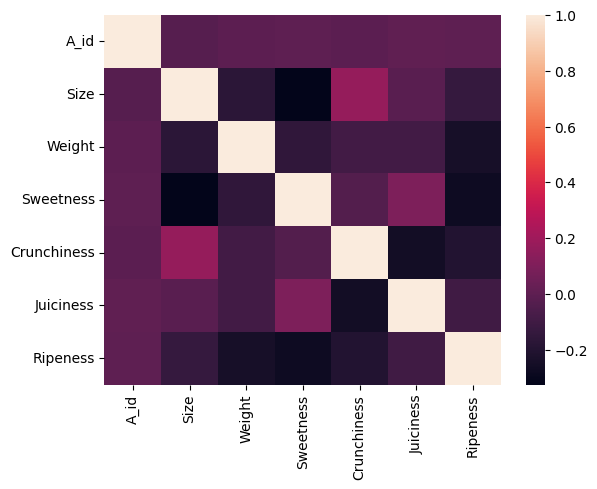

In [ ]:
df_corr = df.corr(method='pearson')
sns.heatmap(df_corr)

- korelacja Pearsona, Spearmana, współczynnik $\gamma$ i tau-b Kendalla (przynajmniej 2, adekwatne)
- testy istotności korelacji

- Korelacja Pearsona mierzy siłę i kierunek liniowego związku między dwiema zmiennymi dla wartości od [-1, 1]
- Korelacja Spearmana również ocenia związek między dwiema zmiennymi, ale jest odporna na nieliniowe związki dla wartości z przedziału od [-1, 1]
- Korelacja Kendall'a mierzy podobieństwo między porządkami dwóch zmiennych dla wartości od [0-1]

(Opis testu korelacji)

- Pearson: Funkcja dodatkowo przeprowadza test zerowej hipotezy, że rozkłady podstawowe próbek są nieskorelowane i mają rozkład normalny.
- $H_1$: Średnie rozmiary jabłek o dobrej i złej jakości różnią się.

In [ ]:
pearson_corr, pearson_p_value = pearsonr(df["Crunchiness"], df['Size'])
print("\nPearson Coefficient:", pearson_corr)
print("P-wartość dla testu istotności Pearsona:", pearson_p_value)


Pearson Coefficient: 0.16986808921230934
P-wartość dla testu istotności Pearsona: 2.8055782890063123e-27


## Korelacja Spearmana i $\tau-B$ Kendalla

Do korelacji Spearmana i Kendalla potrzebujemy danych w postaci rang.

In [ ]:
df_2 = df.copy()
cos = np.sort(df_2['Crunchiness'].values)
cos2 = np.sort(df_2['Size'].values)
for i in range(len(df_2)):
  for j in range(len(cos)):
    if(df_2["Crunchiness"][i] == cos[j]):
      df_2["Crunchiness"][i] = j
    if(df_2["Size"][i] == cos2[j]):
      df_2["Size"][i] = j
df_2["Crunchiness"] = df_2["Crunchiness"].astype(int)
df_2["Size"] = df_2["Size"].astype(int)

In [ ]:
df_2["Crunchiness"]
df_2["Size"]

0        135
1       1468
2       2169
3       1870
4       3321
        ... 
3995    2449
3996    2168
3997     545
3998     129
3999    2610
Name: Size, Length: 4000, dtype: int64

<Axes: >

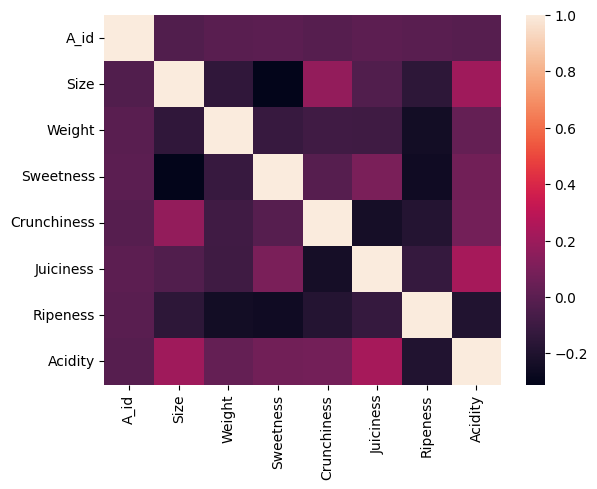

In [ ]:
df_corr = df_2.corr(method='spearman')
sns.heatmap(df_corr)

<Axes: >

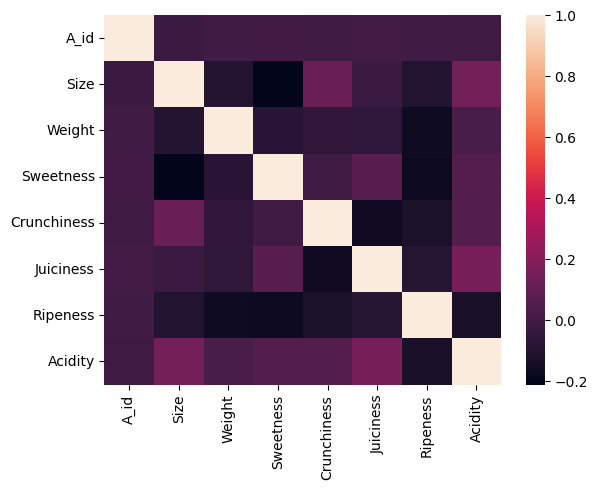

In [ ]:
df_corr = df_2.corr(method='kendall')
sns.heatmap(df_corr)

In [ ]:
kendall_corr, _ = kendalltau(df['Crunchiness'], df['Size'])
n = len(df['Crunchiness'])
z_statistic = kendall_corr * ((9 * (n * (n - 1))) / (2 * (2 * n + 5))) ** 0.5
kendall_p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

print("\nKendall's Tau-b Correlation:", kendall_corr)
print("P-wartość dla testu istotności Kendall'a:", kendall_p_value)


#P-wartość (p-value) w statystyce jest miarą tego, jak bardzo dane dowody są sprzeczne z hipotezą zerową.
#W kontekście testów korelacji, hipoteza zerowa zakłada brak istotnego statystycznego związku między zmiennymi


Pearson Coefficient: 0.16986808921230934
P-wartość dla testu istotności Pearsona: 2.8055782890063123e-27

Spearman Coefficient: 0.09753988603374288
P-wartość dla testu istotności Spearmana: 6.338253494694265e-10

Kendall's Tau-b Correlation: 0.06504551137784445
P-wartość dla testu istotności Kendall'a: 6.913272176944929e-10


# Testy parametryczne

## Test t-Studenta

Test t-Studenta to statystyczna metoda analizy danych, używana do porównywania średnich dwóch grup próbek. Bazuje na statystyce t, posiadającej rozkład Studenta o k stopniach swobody, gdzie k zależy od wariancji i rozmiarów próbek.

- $H_0$: Średni rozmiar jabłek dobrej jakości jest równy średniemu rozmiarowi jabłek złej jakości.
- $H_1$: Średnie rozmiary jabłek o dobrej i złej jakości różnią się.

In [ ]:
#print(df['Quality'].unique())

print('test t-Studenta dla dwóch niezależnych próbek:')
group1 = df[df['Quality'] == 'good']['Size']
group2 = df[df['Quality'] == 'bad']['Size']
t_stat, p_value = ttest_ind(group1, group2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")
# im większa wartość t, tym większa różnica między grupami
# mniejsze p - silniejsze są dowody przemawiające za odrzuceniem H0 (za istnieniem statystycznie istotnej różnicy).

print('\ntest t-Studenta dla jednej próbki:')
sample = df['Ripeness']
#print(sample.mean())
pop_mean = 0.5 #przypuszczamy
t_stat, p_value = ttest_1samp(sample, pop_mean)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

test t-Studenta dla dwóch niezależnych próbek:
t-statistic: 15.90939700060386, p-value: 2.6282469018256428e-55

test t-Studenta dla jednej próbki:
t-statistic: -0.0581217781114771, p-value: 0.9536545312126403


- Pierwszy test dla dwóch niezależnych próbek dał wysoką wartość statystyki t, co oznacza dużą różnicę między grupami 1 i 2, zaś niska wartość p informuje, że silniejsze są dowody przemawiające za odrzuceniem $H_0$ (istnieniem statystycznie istotnej różnicy w średnich wartościach).

- Drugi test dla pojedyńczej próbki sprawdza czy średnia dojrzałość jabłka jest na poziomie 0.5

## Test Levene'a

- $H_0$: Wariancja w badanych próbach jest równa.
- $H_1$: Istnieje istotna różnica w wariancjach.

In [ ]:
from scipy.stats import levene
from itertools import combinations
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html oraz [4]

selected_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']
data_to_test = df[selected_columns]

for combo in combinations(selected_columns, 3):
    subset = data_to_test[list(combo)]
    statistic, p_value = levene(*[subset[col].dropna() for col in combo])
    print(f"Columns: {combo}")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    if p_value >= 0.05: print("!!!!!!!!!WARIANCJA ROWNA - H0!!!!!!!!!!!!")

#if p_value < 0.05: print("Odrzucamy hipotezę zerową")
#The value of the statistic tends to be high when there is a large difference in variances

Columns: ('Size', 'Weight', 'Sweetness')
Test statistic: 88.48421985460791
P-value: 7.119724248784083e-39
Columns: ('Size', 'Weight', 'Crunchiness')
Test statistic: 206.42721989553223
P-value: 7.208901403837098e-89
Columns: ('Size', 'Weight', 'Juiciness')
Test statistic: 91.98155031997453
P-value: 2.270392533756231e-40
Columns: ('Size', 'Weight', 'Ripeness')
Test statistic: 80.5186184239858
P-value: 1.8357953183907624e-35
Columns: ('Size', 'Sweetness', 'Crunchiness')
Test statistic: 228.57916564632004
P-value: 3.749900439987147e-98
Columns: ('Size', 'Sweetness', 'Juiciness')
Test statistic: 0.1194397752207398
P-value: 0.8874185059614177
!!!!!!!!!WARIANCJA ROWNA - H0!!!!!!!!!!!!
Columns: ('Size', 'Sweetness', 'Ripeness')
Test statistic: 2.7352700627517135
P-value: 0.06491694332463908
!!!!!!!!!WARIANCJA ROWNA - H0!!!!!!!!!!!!
Columns: ('Size', 'Crunchiness', 'Juiciness')
Test statistic: 236.2888811417971
P-value: 2.241993643597427e-101
Columns: ('Size', 'Crunchiness', 'Ripeness')
Test st

# Testy nieparametryczne

- Test Shapiro-Wilka (test na normalność danych)
- Test U-Manna-Whitneya (test dwóch zmiennych, na to czy są próbki tych zmiennych są jednakowo duże)
- Test Kruskalla-Wallisa (porównanie rozkładów 2 zmiennych)
- Test Kołmogorowa-Smirnowa (porównywanie rozkładów 2 zmiennych)


## Test Shapiro-Wilka

Test sprawdzający, czy dane mają rozkład normalny

- $H_0$:  Próba pochodzi z populacji o rozkładzie normalnym
- $H_1$:  Próba nie pochodzi z populacji o rozkładzie normalnym

In [ ]:
print(df.columns)
from scipy.stats import shapiro

column_name = 'Size'  # można wybrać kolumnę

stat, p_value = shapiro(df[column_name])
print(f"Test Shapiro-Wilka dla kolumny '{column_name}':")
print(f"Statystyka testowa: {stat}, p-value: {p_value}")
#if p_value > 0.05: print("Nie ma podstaw do odrzucenia hipotezy zerowej")



Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')
Test Shapiro-Wilka dla kolumny 'Size':
Statystyka testowa: 0.9996670484542847, p-value: 0.7846211791038513
Nie ma podstaw do odrzucenia hipotezy zerowej - dane są z rozkładu normalnego.


## Test U-Manna-Whitneya

Dla testu Manna-Whitneya należy założyć, że wszystkie obserwacje, dla obydwu grup, są niezależne statystycznie [3]

- $H_0$:  Wartości prób pobranych z dwóch populacji są jednakowo duże.
- $H_1$: Wartości prób są rózne.

In [ ]:
from scipy.stats import mannwhitneyu

#'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'
column1 = 'Size'
column2 = 'Sweetness' #'Crunchiness'

stat, p_value = mannwhitneyu(df[column1], df[column2])

print(f"Test U-Manna-Whitneya dla kolumn '{column1}' i '{column2}':")
print(f"Statystyka testowa: {stat}, p-value: {p_value}")

#if p_value > 0.05: print("Nie ma podstaw do odrzucenia hipotezy zerowej.")

Test U-Manna-Whitneya dla kolumn 'Size' i 'Sweetness':
Statystyka testowa: 7956050.0, p-value: 0.670463030938065
Nie ma podstaw do odrzucenia hipotezy zerowej.


## Test Kruskala-Wallisa

- $H_0$: Dystrybuanty rozkładów w porównywanych populacjach są równe
- $H_1$: Dystrybuanty rozkładów w populacjach nie są równe

In [ ]:
from scipy.stats import kruskal
#'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'
column1 = 'Size'
column2 = 'Sweetness' #'Weight'

stat, p_value = kruskal(df[column1], df[column2])

print(f"Test Kruskalla-Wallisa dla kolumn '{column1}' i '{column2}':")
print(f"Statystyka testowa: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej - rozkłady są podobne.")
else:
    print("Odrzucamy hipotezę zerową - rozkłady są różne.")

Test Kruskalla-Wallisa dla kolumn 'Size' i 'Weight':
Statystyka testowa: 139.9767322858097, p-value: 2.693406212805119e-32
Odrzucamy hipotezę zerową - rozkłady są różne.


## Test Kołmogorowa-Smirnowa

- $H_0$: Rozkłady cech są podobne
- $H_1$: Rozkłady cech są różne

In [ ]:
from scipy.stats import ks_2samp

column1 = 'Sweetness'
column2 = 'Size' #'Juiciness'

stat, p_value = ks_2samp(df[column1], df[column2])

print(f"Test Kołmogorowa-Smirnowa dla kolumn '{column1}' i '{column2}':")
print(f"Statystyka testowa: {stat}, p-value: {p_value}")

#if p_value > 0.05: print("Nie ma podstaw do odrzucenia hipotezy zerowej")

Test Kołmogorowa-Smirnowa dla kolumn 'Sweetness' i 'Juiciness':
Statystyka testowa: 0.22875, p-value: 4.0024359488229694e-92
Odrzucamy hipotezę zerową - rozkłady są różne.


# Regresja

## Regresja liniowa

Do regresji liniowej zastosowaliśmy model na bazie metody najmniejszych kwadratów (OLS, Ordinary Least Squares). Dobiera on nieznane nam parametry za pomocą minimalizacji kwadratów różnic między wartościami zależnej zmiennej zaobserwowanej ($y$) a wartością funkcji zmiennej niezależnej ($f(X)$). Przy założeniu, że błędy mają rozkład normalny ze średnią 0, OLS jest lepszym estymatorem od reszty liniowych nieobciążonych estymatorów.

Do regresji użyliśmy zmiennej `Acidity` jako zmienną zależną i `Juiciness` jako niezależną.



In [ ]:
X=sm.add_constant(df["Acidity"])
model=sm.OLS(df["Juiciness"],X).fit()
print(model.summary())
y_pred=model.predict(X)
mae=mean_absolute_error(df["Juiciness"],y_pred)
rmse=np.sqrt(mean_squared_error(df["Juiciness"],y_pred))
print(f"MAE: {mae}\nRMSE: {rmse}")

                            OLS Regression Results                            
Dep. Variable:              Juiciness   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     263.6
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.85e-57
Time:                        15:50:51   Log-Likelihood:                -8178.2
No. Observations:                4000   AIC:                         1.636e+04
Df Residuals:                    3998   BIC:                         1.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4946      0.030     16.719      0.0

- $R^2$ - wpółczynnik determinacji, im bliższe 1, tym lepszy model
- $F$ - test do oceny mocy wyjaśniającej grupy zmiennych niezależnych na zmienność zmiennej zależnej, zależy głównie od reszt, liczb obserwacji i wartości regresji

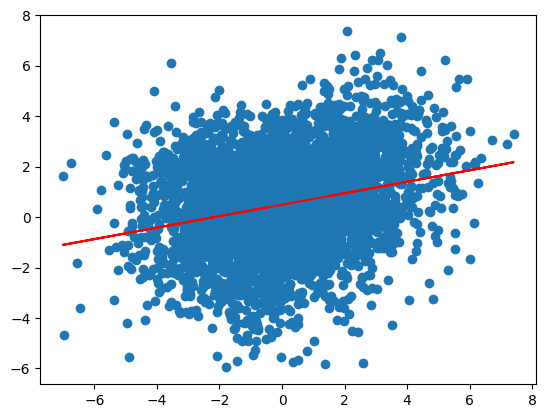

In [ ]:
plt.scatter(df["Acidity"],df["Juiciness"])
plt.plot(df["Acidity"],y_pred,color='red')

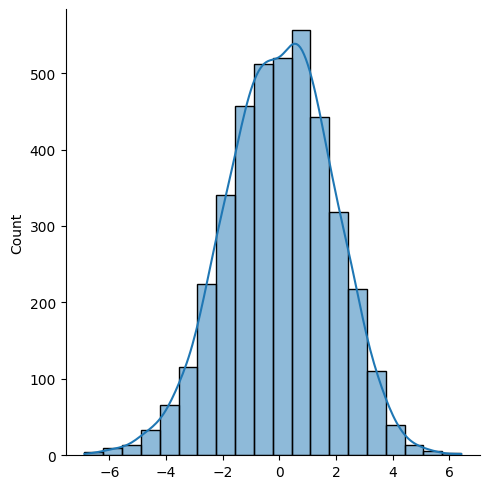

In [ ]:
sns.displot(model.resid,bins=20,kde=True)

Test Durbina-Watsona

In [ ]:
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(model.resid) #test na autokorelację reszt
print(f"Statystyka Durbina-Watsona: {dw}") #-> niezależność reszt

Statystyka Durbina-Watsona: 2.025986490112209


- analiza reszt
  - normalność -> K-S lub S-W
  - symetria, normalność reszt -> wykres
  - nieobciążoność -> średnia wartość reszt = 0
  - niezależność reszt -> Durbin-Watson

Test Jarque-Bera

Test sprawdzający na podstawie skośności i kurtozy normalność danych. Dane są znacznie różne od zera co oznacza brak normalności danych.

## Regresja logistyczna


In [ ]:
#krzywa logistyczna jest od 0 do 1
X=sm.add_constant(df["Acidity"])
y_logit=(df["Ripeness"]-min(df["Ripeness"]))/(max(df["Ripeness"])-min(df["Ripeness"]))
print(y_logit)
model=sm.Logit(y_logit,X).fit()
print(model.summary())

0       0.472770
1       0.513807
2       0.444693
3       0.187052
4       0.348084
          ...   
3995    0.618866
3996    0.364566
3997    0.811182
3998    0.463966
3999    0.388327
Name: Ripeness, Length: 4000, dtype: float64
Optimization terminated successfully.
         Current function value: 0.689158
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Ripeness   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:               -0.001503
Time:                        13:57:30   Log-Likelihood:                -2756.6
converged:                       True   LL-Null:                       -2752.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err  

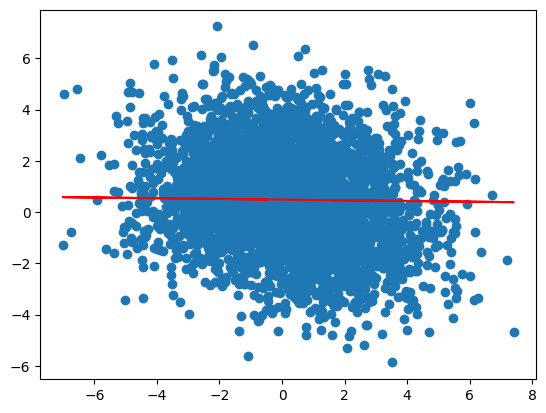

In [ ]:
plt.scatter(df["Acidity"],df["Ripeness"])
y_pred=model.predict(X)
plt.plot(df["Acidity"],y_pred,color='red')

## ANOVA

Analiza Wariancji, podobnie do testu t-Studenta sprawdza równość średnich i wyjaśnia z jakim prawdopodobieństwem podane czynniki powodują różnice w średnich grupowych

Założenia:
- niezależność obserwacji
- rozkład reszt jest normalny
- wariancja danych w grupie powinna być taka sama

- $H_0$: Średnie są takie same
- $H_1$: Średnie nie są takie same

In [ ]:
from scipy.stats import f_oneway
f_statistic,p_value=f_oneway(df['Acidity'],df["Ripeness"])
print(f_statistic,p_value)

89.1600118891951 4.6857365190004865e-21


In [ ]:
f_statistic,p_value=f_oneway(df['Crunchiness'],df["Size"])
print(f_statistic,p_value)

1558.8785996195006 1.2093904412054e-311


Test Tukey'a

In [ ]:
mc = MultiComparison(df['Crunchiness'], df["Quality"]) # honestly significant difference HSD
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   bad   good  -0.0347 0.4339 -0.1217 0.0523  False
---------------------------------------------------


Test Scheffe

(Dostosowywanie poziomów istotności, konstruowanie przedziałów ufności dla regresji)

In [ ]:
#[2]
groups = [df['Size'][df['Quality'] == quality] for quality in df['Quality'].unique()]
f_stat, p_value_anova = f_oneway(*groups)

#stopnie swobody
df_between = len(df['Quality'].unique()) - 1
df_within = len(df) - len(df['Quality'].unique())

#krytyczna wartość F dla testu Scheffe
#ppf(q, dfn, dfd, loc=0, scale=1), Percent Point Function (inverse of cdf — percentiles).
critical_value = f.ppf(0.95, df_between, df_within)
print("wartosc krytyczna:",critical_value)

mean_values = [group.mean() for group in groups]
n_samples = [len(group) for group in groups]

scheffe_results = []
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        mean_diff = np.abs(mean_values[i] - mean_values[j])
        se_diff = np.sqrt(np.var(groups[i]) / n_samples[i] + np.var(groups[j]) / n_samples[j])
        scheffe_stat = mean_diff / se_diff
        # czy przewyższa krytyczną wartość F? jesli tak to juz dajmy 1
        if scheffe_stat > critical_value:
            p_value_scheffe = 1.0
        else:
            p_value_scheffe = 2 * (1 - t.cdf(np.abs(scheffe_stat), df_within))

        # dla kolumny quality
        scheffe_results.append({
            'Group 1': df['Quality'].unique()[i],
            'Group 2': df['Quality'].unique()[j],
            'Scheffe Statistic': scheffe_stat,
            'P-Value': p_value_scheffe
        })
print(pd.DataFrame(scheffe_results))

wartosc krytyczna: 3.843785811390639
  Group 1 Group 2  Scheffe Statistic  P-Value
0    good     bad          15.916957      1.0


### Bibliografia

[1]https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

[2]https://en.wikipedia.org/wiki/Scheff%C3%A9%27s_method

[3]https://pl.wikipedia.org/wiki/Test_Manna-Whitneya

[4] https://en.wikipedia.org/wiki/Levene%27s_test

[5] https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

[] Materiały z PZE

